In [1]:
import pandas as pd
from Handler import *
import os

In [ ]:
def replace_nan(data_frame, cols, default_values):
    """"""
    for idx, col in enumerate(cols):
        data_frame[col] = data_frame[col].fillna(default_values[idx])
    return data_frame

In [ ]:
def apply_cuts(data_frame, path_master_cat):
    """"""
    data_frame = unsheared_object_cuts(data_frame=data_frame)
    data_frame = flag_cuts(data_frame=data_frame)
    data_frame = unsheared_shear_cuts(data_frame=data_frame)
    data_frame = binary_cut(data_frame=data_frame)
    data_frame = mask_cut_healpy(
        data_frame=data_frame,
        master=path_master_cat
    )
    data_frame = unsheared_mag_cut(data_frame=data_frame)
    return data_frame

In [ ]:
def check_idf_flux(data_frame):
    lst_bins = ["r", "i", "z"]
    for mag_bin in lst_bins:
        flux_name = f"unsheared/flux_{mag_bin}"
        mag_name = f"unsheared/mag_{mag_bin}"
        if flux_name not in data_frame.keys():
            data_frame.loc[:, flux_name] = mag2flux(data_frame[mag_name])
    return data_frame

In [2]:
path_data = "/project/ls-gruen/users/patrick.gebhardt/data/gaNdalF_paper_catalogs"
path_data_master_cat = "/project/ls-gruen/users/patrick.gebhardt/data/gaNdalF"
filename_flw_balrog = "2024-10-28_08-14_balrog_flw_Test_sample.pkl"
filename_flw_gandalf = "2024-10-28_08-14_gandalf_flw_Test_sample.pkl"
filename_master_cat = "Y3_mastercat_02_05_21.h5"
path_save_plots = "/home/p/P.Gebhardt/Output/gaNdalF_paper"

In [ ]:
columns=[
    "Color unsheared MAG r-i",
    "Color unsheared MAG i-z",
    "unsheared/mag_r",
    "unsheared/mag_i",
    "unsheared/mag_z",
    "unsheared/snr",
    "unsheared/size_ratio",
    "unsheared/weight",
    "unsheared/T"
]

In [3]:
df_balrog_flw = pd.read_pickle(f"{path_data}/{filename_flw_balrog}")
df_gandalf_flw = pd.read_pickle(f"{path_data}/{filename_flw_gandalf}")

KeyboardInterrupt: 

In [ ]:
df_gandalf_flw = replace_nan(
    data_frame=df_gandalf_flw,
    cols=[
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T",
    ],
    default_values=[
        df_balrog_flw["unsheared/mag_r"].max(),
        df_balrog_flw["unsheared/mag_i"].max(),
        df_balrog_flw["unsheared/mag_z"].max(),
        df_balrog_flw["unsheared/snr"].max(),
        df_balrog_flw["unsheared/size_ratio"].max(),
        df_balrog_flw["unsheared/weight"].max(),
        df_balrog_flw["unsheared/T"].max(),
    ]
)

In [ ]:
df_gandalf_flw["Color unsheared MAG r-i"] = df_gandalf_flw["unsheared/mag_r"] - df_gandalf_flw["unsheared/mag_i"]
df_gandalf_flw["Color unsheared MAG i-z"] = df_gandalf_flw["unsheared/mag_i"] - df_gandalf_flw["unsheared/mag_z"]

In [ ]:
df_balrog_flw = check_idf_flux(df_balrog_flw)
df_gandalf_flw = check_idf_flux(df_gandalf_flw)

In [ ]:
df_balrog_flw_cut = apply_cuts(df_balrog_flw, path_master_cat)
df_gandalf_flw_cut = apply_cuts(df_gandalf_flw, path_master_cat)

In [ ]:
df_balrog_flw = df_balrog_flw[columns]
df_gandalf_flw = df_gandalf_flw[columns]
df_balrog_flw_cut = df_balrog_flw_cut[columns]
df_gandalf_flw_cut = df_gandalf_flw_cut[columns]

In [ ]:
print(f"Length of Balrog objects: {len(df_balrog_flw)}")
print(f"Length of gaNdalF objects: {len(df_gandalf_flw)}")
print(f"Length of Balrog objects after mag cut: {len(df_balrog_flw_cut)}")
print(f"Length of gaNdalF objects after mag cut: {len(df_gandalf_flw_cut)}")

In [ ]:
plot_compare_corner(
    data_frame_generated=df_gandalf_flw,
    data_frame_true=df_balrog_flw,
    dict_delta=None,
    epoch=None,
    title=f"Compare Measured Galaxy Properties Balrog-gaNdalF",
    columns=columns,
    labels=[
        "r-i",
        "i-z",
        "mag r",
        "mag i",
        "mag z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    show_plot=False,
    save_plot=True,
    save_name=f"{path_save_plots}/compare_measured_galaxy_properties_datapoints.png",
    ranges=[
        [-0.5, 1.5],
        [-0.5, 1.5],
        [18, 24.5],
        [18, 24.5],
        [18, 24.5],
        [2, 100],
        [-0.5, 5],
        [10, 80],
        [0, 3.5]
    ]
)

/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

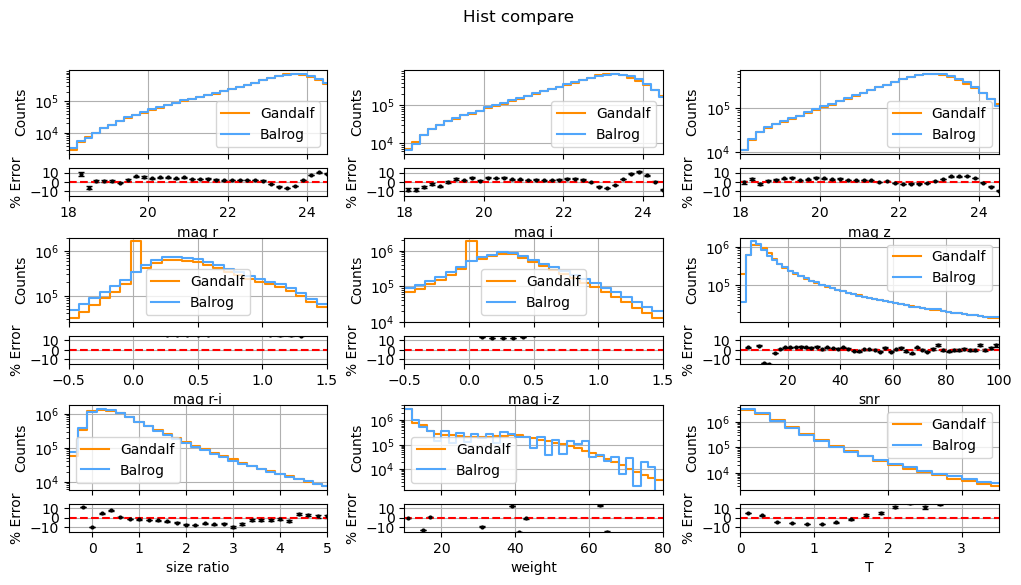

<Figure size 640x480 with 0 Axes>

In [5]:
plot_compare_corner(
    data_frame_generated=df_gandalf_flw_cut,
    data_frame_true=df_balrog_flw_cut,
    dict_delta=None,
    epoch=None,
    title=f"Compare MCAL Measured Galaxy Properties Balrog-gaNdalF",
    columns=columns,
    labels=[
        "r-i",
        "i-z",
        "mag r",
        "mag i",
        "mag z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    show_plot=False,
    save_plot=True,
    save_name=f"{path_save_plots}/compare_mcal_measured_galaxy_properties_datapoints.png",
    ranges=[
        [-0.5, 1.5],
        [-0.5, 1.5],
        [18, 24.5],
        [18, 24.5],
        [18, 24.5],
        [2, 100],
        [-0.5, 5],
        [10, 80],
        [0, 3.5]
    ]
)

In [ ]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw,
    df_balrog=df_balrog_flw,
    columns=columns,
    labels=[
        "r-i",
        "i-z",
        "mag r",
        "mag i",
        "mag z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        0.08,  # mag r-i
        0.08,  # mag i-z
        None,  # mag r
        None,  # mag i
        None,  # mag z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Compare Histogram",
    show_plot=False,
    save_plot=True,
    save_name=f"{path_save_plots}/hist_plot.png"
)

Plot histogram for col Color unsheared MAG r-i. Δmean=nan
Δmedian=nan


/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

Plot gandalf kde for col Color unsheared MAG i-z and Color unsheared MAG r-i


/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

In [ ]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    columns=columns,
    labels=[
        "mag r-i",
        "mag i-z",
        "mag r",
        "mag i",
        "mag z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        0.08,  # mag r-i
        0.08,  # mag i-z
        None,  # mag r
        None,  # mag i
        None,  # mag z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Compare MCAL Histogram",
    show_plot=False,
    save_plot=True,
    save_name=f"{path_save_plots}/mcal_hist_plot.png"
)